### Gradient Descent 

##### Notebook ini akan diharapkan mampu membangun intuisi pembaca terhadapa metode-metode gradient descent. Dalam notebook ini akan divisualisasikan beberapa contoh metode gradient descent pada permukaan dua dimensi. Metode yang akan dipelajari pada notebook ini adalah gradient descent, gradient descent dengan momentum, NAG, ADAM dan RMSProp.

##### Pada notebook ini akan digunakan beberapa contoh fungsi sederhana yaitu fungsi kuadratik minimum :
$$ z= ax^2 +by^2 $$
##### fungsi *sadle*
$$ z=ax^2-by^2 $$
##### dan fungsi Beale yakni sebuah fungsi konveks yang biasa digunakan menguji masalah optimasi
$$ z=(1.4-x+xy)^2 + (2.25 -x + xy^2)^2 + (2.6250 -x +xy)^3 $$

In [2]:
## Fungsi untuk ploting

%matplotlib inline

#ploting 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm

import numpy as np

def plot_surface(x,y,z,azim=-60,elev=40, dist =10,cmap="RdYlBu_r"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    plt.xticks([-1, -0.5, 0, 0.5, 1],
               [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
    plt.yticks([-1, -0.5, 0, 0.5, 1],
               [r"$-1$", r"$-1/2$", r"$0$", r"$1/2$", r"$1$"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels([r"$-2$", r"$-1$", r"$0$", r"$1$", r"$2$"])
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$y$", fontsize=18)
    ax.set_zlabel(r"z", fontsize=18)
    return fig,ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;
    

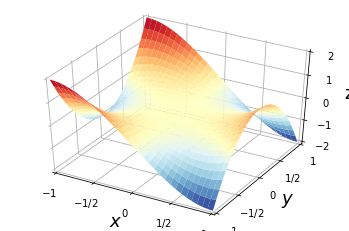

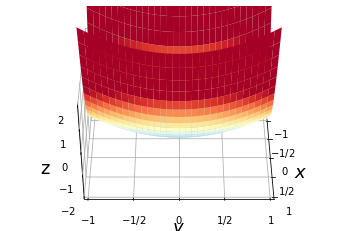

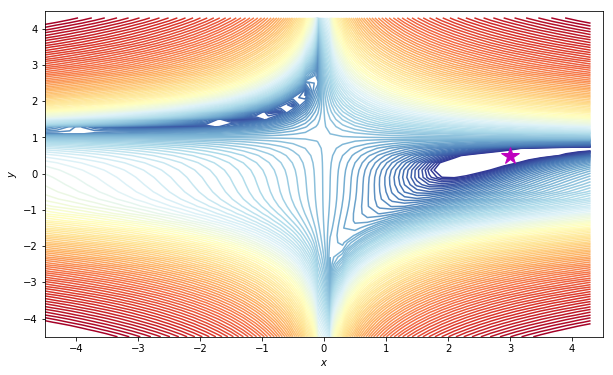

In [3]:
#Deklarasi fungsi

#monkey sadle dan gradientnya
def monkey_saddle(x,y):
    return x**4 - 3*x*y**4

def grad_monkey_saddle(params):
    x=params[0]
    y=params[1]
    grad_x=3*x**2-3*y**2
    grad_y=-6*x*y
    return [grad_x,grad_y]

#fungsi sadle
def saddle_surface(x,y,a=1,b=1):
    return a*x**2-b*y**2
def grad_saddle_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x=a*x
    grad_y=-1*b*y
    return [grad_x,grad_y]
#fungsi minima surface
def minima_surface(x,y,a=1,b=1):
    return a*x**2+b*y**2-1
def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x=2*a*x
    grad_y=2*b*y
    return [grad_x,grad_y]
def beales_function(x,y):
    f=np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot fungsi beales
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 100), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'm*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax
    
#Plot fungsi

x, y = np.mgrid[-1:1:31j, -1:1:31j]
a,b=np.meshgrid(np.arange(-5, 5, 0.1),np.arange(-5, 5, 0.1))
fig1,ax1=plot_surface(x,y,monkey_saddle(x,y))
#fig2,ax2=plot_surface(x,y,saddle_surface(x,y))
fig3,ax3=plot_surface(x,y,minima_surface(x,y,5),0)

#plot funsi beales

fig4,ax4 =contour_beales_function()
plt.show()
#

# Gradient descent dengan dan tanpa momentum

##### Pada bagian ini akan divisualisasikan variasi algoritma gradient descent yang sering digunakan pada Machine Learning. Dengan memvisualisasikan algoritma gradient descent diharapkan para pembaca akan paham bagaimana hyperparameter terutama learning rate akan mempengaruhi pencarian nilai optimum. 

### Gradient Descent
##### Pada metode ini sebuah parameter $\theta$ akan diperbarui pada setiap iterasi menurut persamaan
$$\theta_{t+1}=\theta_t - \eta_t \nabla_{\theta}E(\theta) $$
##### dengan $\eta_t$ adalah learning rate yang mengontrol seberapa besar langkah yang diambil setiap iterasi. Algoritma ini sangat sensitif terhadap pemilihan learning rate $\eta_t$. Jika pemiliha $\eta_t$ terlalu besar, parameter nya akan berosilasi disekitar titik minimum dan algoritma tidak akan memberikan informasi penting oada skala kecil. JIka $\eta_t$ terlalu kecil jalannya algoritma akan sangat lambat.

### Gradient Descent dengan Momentum
##### Salah satu masalah dalam gradient descent adalah tidak ada informasi (memori) darimana dia berasal. Hal seperti itu akan menjadi masalah ketika terdapat lembah-lembah minimum pada fungsi yang kita tinjau. Jika dianalogikan dengna bola menggelinding dari bukit tidak ada informasi (memori) bisa ekuivalen dengan tidak memiliki inersia atau momentum. Tanpa momentum bola tidak memiliki energi kinetik sehingga tidak dapat keluar dari lembah.  Dari analogi tersebut kita dapat menambah suku baru yang mewakilkan memori atau momentum pada persamaan gradient descent sehingga
$$ \nu_t=\gamma \nu_{t-1} + \eta_t \nabla_{\theta} E(\theta_t) $$
$$ \theta_{t+1} = \theta_t - \nu_t $$

##### dengan $0\leq \gamma \leq 1$ disebut dengan parameter momentum. Ketika $\gamma=0$ algoritma ini berubah menjadi algoritma gradient descent tanpa momentum. 



##### Contoh lain gradient descent dengan momentum adlah Nesterov Accelerated Gradient (NAG). Algoritma NAG tidak menghitung gradient pada posisi dimana momemntumnya akan membawa gradient ke $t+1$ atau $E(\theta)$ berubah menjadi $E(\theta_t-\gamma \nu_{t-1})$. Dituliskan dalam bentuk persamaan menjadi
$$ \nu_t =\gamma \nu_{t-1} + \eta_t \nabla_{\theta} E(\theta_t-\gamma\nu_{t-1}) $$



$$ \theta_{t+1} = \theta_t -\nu_t $$

In [4]:
# algoritma gradient biasa

def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

# algoritma gradient dengan momentum
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#algoritma NAG
def NAG(grad, init, n_epochs, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


/home/muhammadaugi/yes/envs/ML/lib/python3.6/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


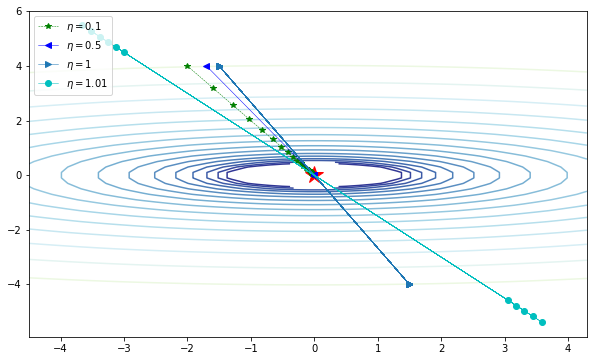

In [5]:
# Investigate effect of learning rate in GD

x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,10)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3,4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01
gd_1=gd(grad_minima_surface,init1, n_epochs=100, eta=eta1)
gd_2=gd(grad_minima_surface,init2, n_epochs=100, eta=eta2)
gd_3=gd(grad_minima_surface,init3, n_epochs=100, eta=eta3)
gd_4=gd(grad_minima_surface,init4, n_epochs=10, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

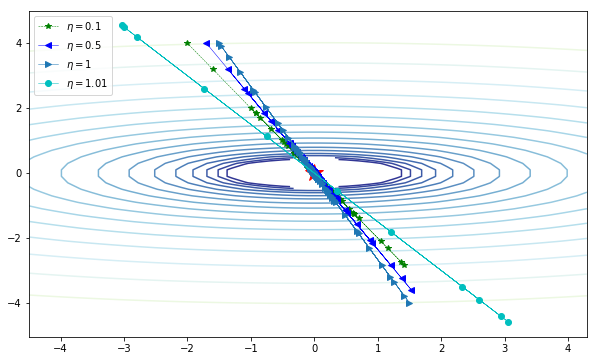

In [6]:

x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,10)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3,4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01

gd_1=gd_with_mom(grad_minima_surface,init1, n_epochs=100, eta=eta1)
gd_2=gd_with_mom(grad_minima_surface,init2, n_epochs=100, eta=eta2)
gd_3=gd_with_mom(grad_minima_surface,init3, n_epochs=100, eta=eta3)
gd_4=gd_with_mom(grad_minima_surface,init4, n_epochs=10, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

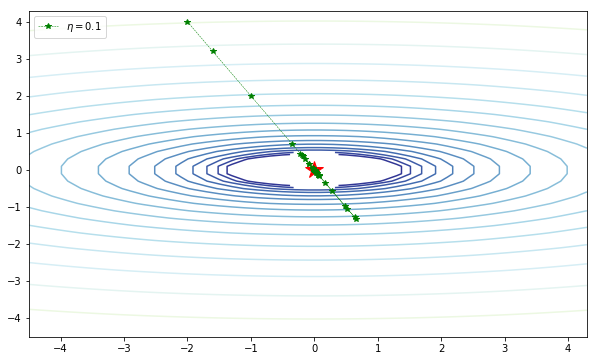

In [7]:
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=minima_surface(x,y,1,10)
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3,4.5]
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01

gd_1=NAG(grad_minima_surface,init1, n_epochs=100, eta=eta1)
#gd_2=NAG(grad_minima_surface,init2, n_epochs=100, eta=eta2)
#gd_3=NAG(grad_minima_surface,init3, n_epochs=100, eta=eta3)
#gd_4=NAG(grad_minima_surface,init4, n_epochs=10, eta=eta4)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
#overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
#overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
#overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

# Gradien Descend yang Memanfaatkan Second Moment
##### Pada stokastik gradient descent dengan momentum atau tidak, masih ada masalah untuk mengatur learning rates $\eta_t$. Learning rate $\eta_t$ dibatasi oleh pengambilang langkah yang arahnya akan sangat bergantung pada landskap fungsi. Untuk menangani masalah ini idealnya, Algoritma kita akan mengambil ukuran langkah yang besar ketika berada di daerah dangkal, arah yang lurus dan langkah kecil di daerah curam yang sempit. Algoritma seperti itu dapat dilakukan dengan menggunakan menghitung matriks Hessian dan menormalisasi learning rate sesuai dengan kurvaturenya. Namun menghitung matriks Hessian membutuhkan sumber daya komputer yang sangat besar, pendekatan lain dapat dilakukan dengan algoritma RMS prop dan ADAM.


# RMS Prop
##### pada algoritma RMS prop pemmbaruan parameternya diberikan
$$
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) \\
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber \\
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t + \eta_t { \mathbf{g}_t \over \sqrt{s_t +\epsilon}}, \nonumber \\
$$
##### dengan $\beta$ parameter yang mengontrol second moment $s_t$ seringya nilai $\beta=0.9$,$\eta_t=10^{-3}$ dan $\epsilon\sim 10^{-8}$ adalah parameter regulasi supaya fungsinya tidak divergen.

# Adam 
Pada algoritma Adam *first* dan *second* momennya dari gradiennya digunakan sebagai informasi untuk memperbarui *learning rate* untuk parameter yang berbeda. Algoritma Adam didefinisikan sebagai
$$
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) \\
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber \\
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber \\
\hat{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1} \nonumber \\
\hat{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2} \nonumber \\
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t + \eta_t { \hat{\mathbf{m}}_t \over \sqrt{\hat{\mathbf{s}}_t +\epsilon}}, \nonumber 
$$
dengan $\beta_1$ dan $\beta_2$ adalah * memory lifetime* dari *first moment* dan *second moment* yang biasanya masing-masing bernilai $0.9$ dan $0.99$


In [8]:



def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

/home/muhammadaugi/yes/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/home/muhammadaugi/yes/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/home/muhammadaugi/yes/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/home/muhammadaugi/yes/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


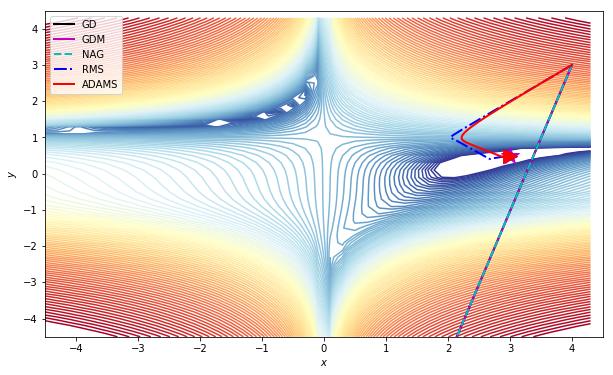

In [9]:
#dengan mengubah nilai learning rate pada source code ini, akan terlihat betapa pemilihan learning rate sangat mempengeruhi konvergensi
Nsteps=10**4
#learning rate
lr_l=10**-3
lr_s=10**-3
init1=np.array([4,3])
fig1, ax1=contour_beales_function()
gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')
plt.legend(loc=2)
#init2=np.array([1.5,1.5])
#gd_trajectory2=gd(grad_beales_function,init2,Nsteps, eta=10**-6, noise_strength=0)
#gdm_trajectory2=gd_with_mom(grad_beales_function,init2,Nsteps,eta=10**-6, gamma=0.9,noise_strength=0)
#NAG_trajectory2=NAG(grad_beales_function,init2,Nsteps,eta=10**-6, gamma=0.9,noise_strength=0)
#rms_prop_trajectory2=rms_prop(grad_beales_function,init2,Nsteps,eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0)
#adam_trajectory2=adams(grad_beales_function,init2,Nsteps,eta=10**-3, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
#overlay_trajectory_contour_M(ax1,gdm_trajectory2, 'GDM','m')
#overlay_trajectory_contour_M(ax1,NAG_trajectory2, 'NAG','c--')
#overlay_trajectory_contour_M(ax1,rms_prop_trajectory2,'RMS', 'b-.')
#overlay_trajectory_contour_M(ax1,adam_trajectory2,'ADAMS', 'r')
#init3=np.array([-1,4])
#gd_trajectory3=gd(grad_beales_function,init3,10**5, eta=lr_s, noise_strength=0)
#gdm_trajectory3=gd_with_mom(grad_beales_function,init3,10**5,eta=lr_s, gamma=0.9,noise_strength=0)
#NAG_trajectory3=NAG(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
#rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
#adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
#overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
#overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
#overlay_trajectory_contour_M(ax1,NAG_trajectory3, 'NAG','c--')
#overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
#overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

#init4=np.array([-2,-4])
#gd_trajectory4=gd(grad_beales_function,init4,Nsteps, eta=lr_s, noise_strength=0)
#gdm_trajectory4=gd_with_mom(grad_beales_function,init4,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
#NAG_trajectory4=NAG(grad_beales_function,init4,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
#rms_prop_trajectory4=rms_prop(grad_beales_function,init4,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
#adam_trajectory4=adams(grad_beales_function,init4,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)
#overlay_trajectory_contour_M(ax1,gd_trajectory4, 'GD','k')
#overlay_trajectory_contour_M(ax1,gdm_trajectory4, 'GDM','m')
#overlay_trajectory_contour_M(ax1,NAG_trajectory4, 'NAG','c--')
#overlay_trajectory_contour_M(ax1,rms_prop_trajectory4,'RMS', 'b-.')
#overlay_trajectory_contour_M(ax1,adam_trajectory4,'ADAMS', 'r')
plt.show()
